# Assignment 5

1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

# Question 1

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [2]:
#use bike share data for Tuesdays as dataset
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_lenght,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = iris[['petal_width']]
y = iris[['sepal_lenght']]

linear = linear_model.LinearRegression()
linear.fit(x, y)
(linear.coef_, linear.intercept_)

(array([[0.88751905]]), array([4.77949383]))

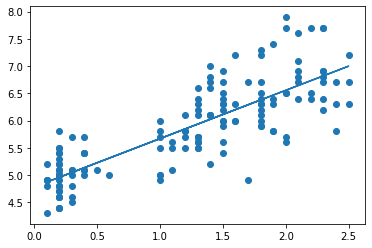

In [4]:
plt.scatter(x, y)
plt.plot(x, np.dot(x, linear.coef_) + linear.intercept_)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [6]:
#training set 
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([[0.86177285]]), array([4.88871468]))

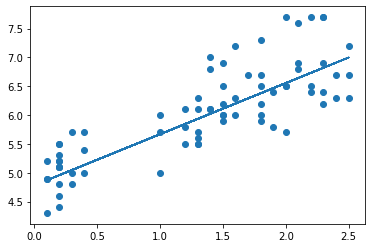

In [7]:
#plot training set
plt.scatter(x_train, y_train)
plt.plot(x_train, np.dot(x_train, linear.coef_) + linear.intercept_)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [9]:
#Training Error
mean_squared_error(y_train, np.dot(x_train, linear.coef_) + linear.intercept_) #MSE

0.22529450012026062

In [10]:
#Training Error
mean_absolute_error(y_train, np.dot(x_train, linear.coef_) + linear.intercept_) #MAE

0.37729757280757814

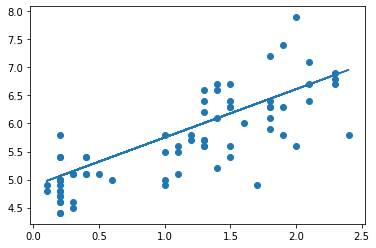

In [11]:
#plot test set
plt.scatter(x_test, y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

In [12]:
#Testing Error
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_) #MSE

0.24462908156117075

In [13]:
#Testing Error
mean_absolute_error(y_test, np.dot(x_test, model.coef_) + model.intercept_) #MAE

0.3811300461680517

# Question 2

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

iris = iris.rename(columns = {'class':'iris_class', 'sepal_lenght':'sepal_length'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris_train, iris_test = train_test_split(iris, test_size=.5)

In [16]:
class_model = DecisionTreeClassifier(criterion='entropy')

class_model.fit(iris_train.drop(['iris_class'], axis=1), iris_train.iris_class)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
#training set
iris_train.drop(['iris_class'] , axis=1).head()

,sepal_length,sepal_width,petal_length,petal_width
135,7.7,3.0,6.1,2.3
88,5.6,3.0,4.1,1.3
118,7.7,2.6,6.9,2.3
39,5.1,3.4,1.5,0.2
86,6.7,3.1,4.7,1.5


In [18]:
set(iris_train.columns) - set(iris_test.columns)

set()

In [19]:
predictions_test = class_model.predict(iris_test.drop(['iris_class'], axis=1))
predictions_train = class_model.predict(iris_train.drop(['iris_class'], axis=1))

In [20]:
#testing set
iris_test.drop(['iris_class'], axis=1).head()

,sepal_length,sepal_width,petal_length,petal_width
34,4.9,3.1,1.5,0.1
92,5.8,2.6,4.0,1.2
148,6.2,3.4,5.4,2.3
84,5.4,3.0,4.5,1.5
101,5.8,2.7,5.1,1.9


In [21]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [22]:
#Accuracy
accuracy_score(iris_test.iris_class, predictions_test)

0.92

In [23]:
#Confusion Matrix
confusion_matrix(iris_test.iris_class, predictions_test)

array([[21,  0,  0],
       [ 0, 26,  1],
       [ 0,  5, 22]], dtype=int64)

In [24]:
#Classification Report
print(classification_report(iris_test.iris_class, predictions_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.84      0.96      0.90        27
 Iris-virginica       0.96      0.81      0.88        27

       accuracy                           0.92        75
      macro avg       0.93      0.93      0.93        75
   weighted avg       0.93      0.92      0.92        75



# Question 3

The metrics in the confusion matrix suggest that this model is very accurate, with a composite score of about 95% and very little type I/type II error. 

In [44]:
#most important features
list(zip(iris.drop(['iris_class'], axis=1).columns, class_model.feature_importances_))

[('sepal_length', 0.023307769320718753),
 ('sepal_width', 0.0),
 ('petal_length', 0.6382476967764151),
 ('petal_width', 0.33844453390286616)]

In [43]:
#balanced dataset, but small n
iris.iris_class.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: iris_class, dtype: int64

In [51]:
#n folds validation - doesn't work with multi-class target
from sklearn.model_selection import cross_validate

#cross_validate(class_model, iris_train.drop(['iris_class'], axis=1), iris_train.iris_class, cv=20, 
                #scoring=['accuracy', 'recall', 'precision', 'f1'], return_train_score=True)

In [46]:
#increase size of training set 
iris_train, iris_test = train_test_split(iris, test_size=.3)

class_model = DecisionTreeClassifier(criterion='entropy')
class_model.fit(iris_train.drop(['iris_class'], axis=1), iris_train.iris_class)

predictions_test = class_model.predict(iris_test.drop(['iris_class'], axis=1))
predictions_train = class_model.predict(iris_train.drop(['iris_class'], axis=1))

print(classification_report(iris_test.iris_class, predictions_test)) #slight improvement

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        17

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [48]:
#try limiting data set to only most predictive fields
iris_train, iris_test = train_test_split(iris, test_size=.3)

class_model = DecisionTreeClassifier(criterion='entropy')
class_model.fit(iris_train.drop(['iris_class', 'sepal_length', 'sepal_width'], axis=1), iris_train.iris_class)

predictions_test = class_model.predict(iris_test.drop(['iris_class', 'sepal_length', 'sepal_width'], axis=1))
predictions_train = class_model.predict(iris_train.drop(['iris_class', 'sepal_length', 'sepal_width'], axis=1))

print(classification_report(iris_test.iris_class, predictions_test)) #another slight improvement

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

